In [4]:
import text2dictionary as t2d
import graphmethods as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import LabelEncoder
from stellargraph import StellarGraph
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

### Homogeneous graph links:

In [5]:
nodes = pd.read_csv("data/nodes.csv")
links = pd.read_csv("data/links_type.csv")
bilinks = pd.read_csv("data/bilinks.csv")

In [6]:
bilinks.head()

,Id,CId,Rating
0,1,110643,5.0
1,2,133242,5.0
2,3,3314,5.0
3,4,217326,4.0
4,5,7580,5.0


In [7]:
bilinks.shape

(410480, 3)

In [8]:
good_ratings = bilinks[bilinks.Rating>4]
good_ratings.shape

(237756, 3)

In [9]:
one = good_ratings.set_index("CId")
two = good_ratings.set_index("CId")
all_links = one.join(two,lsuffix="_1",rsuffix="_2")
all_links.shape

(71918526, 4)

In [10]:
all_links.head()

,Id_1,Rating_1,Id_2,Rating_2
CId,,,,
2,545623,5.0,545623,5.0
3,510263,5.0,510263,5.0
4,354610,5.0,354610,5.0
5,154695,5.0,154695,5.0
5,154695,5.0,234721,5.0


In [11]:
diff_nodes = all_links[all_links.Id_1 != all_links.Id_2]

In [12]:
diff_nodes.shape

(71680770, 4)

In [13]:
df_links = diff_nodes[["Id_1","Id_2"]]
df_links.drop_duplicates(inplace=True)
df_links.shape

/var/folders/hk/kbn1q_sj4jz4lh0m7x05vff80000gn/T/ipykernel_14340/225432727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_links.drop_duplicates(inplace=True)


(71680770, 2)

In [14]:
df_links.reset_index(drop=True,inplace=True)
df_links.drop_duplicates(inplace=True)
df_links.shape

/var/folders/hk/kbn1q_sj4jz4lh0m7x05vff80000gn/T/ipykernel_14340/1484509110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_links.drop_duplicates(inplace=True)


(71680770, 2)

In [15]:
df_links.head()

,Id_1,Id_2
0,154695,234721
1,234721,154695
2,338609,478139
3,478139,338609
4,462849,462850


In [16]:
df_links.columns = ["source","target"]

In [17]:
#df_links.to_csv("hom_graph_links.csv",index=False)

## Homogeneous graph
of products and similarity connections

We have now links and bilinks dataframes. In links dataframe we have product-to-product relationships. In bilinks we have customer-to-product relationships. We have also many attributes for node information.

In [136]:
G = nx.from_pandas_edgelist(links, source='source', target='target') #,edge_attr=True)

In [137]:
missing_nodes = list(set(nodes.Id.values)-set(G.nodes()))
len(missing_nodes)
G.add_nodes_from(missing_nodes)
nx.info(G)

/var/folders/hk/kbn1q_sj4jz4lh0m7x05vff80000gn/T/ipykernel_14340/1405788007.py:4: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 542664 nodes and 236429 edges'

In [138]:
nodes.Id.nunique()

542664

### Graph analysis

In [ ]:
gr.net_prop_dict(G)


{'no_of_nodes': 296458,
 'no_of_edges': 236429,
 'transitivity': 0.007141223411014257,
 'average_clustering': 0.007233427994462534,
 'edge_density': 5.380292133299761e-06,
 'average_degree': 1.5950252649616472,
 'total_triangles': 3372,
 'number_connected_components': 61292}

In [ ]:
gr.net_prop_dict_whole(G,k=2)

{'no_of_nodes': 296458,
 'no_of_edges': 236429,
 'transitivity': 0.007141223411014257,
 'average_clustering': 0.007233427994462534,
 'edge_density': 5.380292133299761e-06,
 'average_degree': 1.5950252649616472,
 'total_triangles': 3372,
 'number_connected_components': 61292,
 'giant_component_prop': {'no_of_nodes': 332,
  'no_of_edges': 331,
  'average_shortest_path_length': 5.471226294907727,
  'diameter': 14,
  'transitivity': 0,
  'average_clustering': 0.0,
  'edge_density': 0.006024096385542169,
  'average_degree': 1.9939759036144578,
  'total_triangles': 0,
  'number_connected_components': 1},
 'k_core_prop': {'no_of_nodes': 3973,
  'no_of_edges': 3973,
  'transitivity': 0.8487289202114271,
  'average_clustering': 0.8487289202114271,
  'edge_density': 0.0005035246727089627,
  'average_degree': 2.0,
  'total_triangles': 3372,
  'number_connected_components': 1263}}

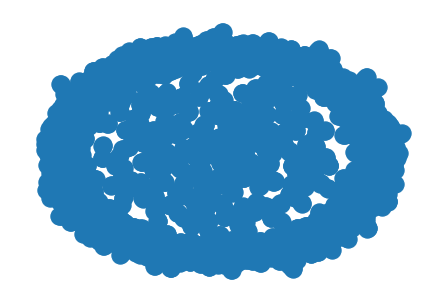

In [ ]:
Gk = nx.k_core(G)
nx.draw(Gk)

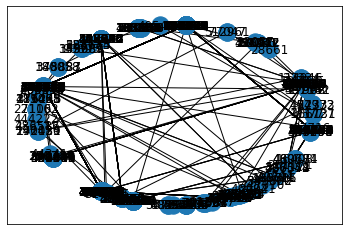

In [ ]:
Giant = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
nx.draw_networkx(Giant,pos=nx.circular_layout(G))

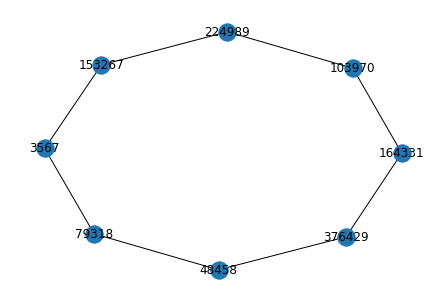

In [ ]:
Gcc = sorted(nx.connected_components(nx.k_core(G)), key=len, reverse=True)
G00 = G.subgraph(Gcc[0])
nx.number_of_nodes(G00)
nx.draw(G00, with_labels = True)

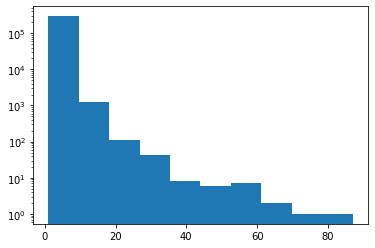

In [ ]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)
plt.yscale("log")
plt.show()

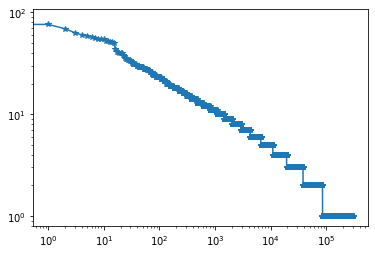

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.loglog(degree_sequence,marker='*')
plt.show()

In [293]:
degree_centrality = nx.degree_centrality(G)

In [ ]:
closeness_centrality = nx.closeness_centrality(G)

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [ ]:
katz_centrality = nx.katz_centrality(G)

In [ ]:
pagerank_centrality = nx.pagerank(G)

In [ ]:
proximity_prestige = gr.proximity_prestige(G)

In [ ]:
centrality_measures = [degree_centrality,closeness_centrality,eigenvector_centrality,katz_centrality,pagerank_centrality,proximity_prestige]

In [ ]:
centrality = pd.DataFrame(centrality_measures).T
centrality.columns = ["degree_centrality","closeness_centrality","eigenvector_centrality","katz_centrality","pagerank_centrality","proximity_prestige"]
centrality.sort_index()

,degree_centrality,closeness_centrality,eigenvector_centrality,katz_centrality,pagerank_centrality,proximity_prestige
1,0.000007,0.000033,4.775611e-12,0.001961,0.000004,3.161290
2,0.000003,0.000003,2.679014e-22,0.001601,0.000003,1.000000
4,0.000003,0.000014,4.247100e-15,0.001626,0.000002,5.272727
5,0.000003,0.000011,1.778994e-15,0.001626,0.000002,2.888889
6,0.000003,0.000007,5.698161e-18,0.001635,0.000002,2.000000
...,...,...,...,...,...,...
548536,0.000003,0.000015,1.477634e-14,0.001709,0.000002,2.200000
548539,0.000003,0.000003,2.679014e-22,0.001601,0.000003,1.000000
548540,0.000003,0.000014,2.523331e-15,0.001675,0.000002,2.636364
548547,0.000003,0.000003,2.679014e-22,0.001601,0.000003,1.000000


## Bipartite graph

In [21]:
bilinks.head()

,Id,CId,Rating
0,1,110643,5.0
1,2,133242,5.0
2,3,3314,5.0
3,4,217326,4.0
4,5,7580,5.0


In [24]:
bilinks["CId"] = bilinks["CId"].apply(lambda x: "C"+str(x))

In [25]:
biedges = []
for i in range(bilinks.shape[0]):
    biedges.append((bilinks.loc[i,"CId"],bilinks.loc[i,"Id"]))

customers = list(bilinks.CId.unique())
products = list(bilinks.Id.unique())
len(customers), len(products), len(biedges)

(229313, 410480, 410480)

In [26]:
from networkx.algorithms import bipartite

biG = nx.Graph()
#nodes
biG.add_nodes_from(customers, bipartite="customers")
biG.add_nodes_from(products, bipartite="products")
#edges
biG.add_edges_from(biedges)
bipartite.is_bipartite(biG)

True

### Graph analysis

In [ ]:
gr.net_prop_dict(biG)

{'no_of_nodes': 464449,
 'no_of_edges': 410480,
 'transitivity': 0,
 'average_clustering': 0.0,
 'edge_density': 3.8058079422844754e-06,
 'average_degree': 1.7675998871781402,
 'total_triangles': 0,
 'number_connected_components': 53970}

In [ ]:
#gr.net_prop_dict_whole(biG)

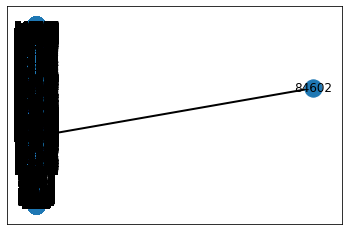

In [ ]:
biGiant = biG.subgraph(sorted(nx.connected_components(biG), key=len, reverse=True)[0])
#nx.draw_networkx(biGiant,pos=nx.circular_layout(biG))
nx.draw_networkx(biGiant, pos = nx.drawing.layout.bipartite_layout(biG, bilinks.Id.unique()), width = 2)

### StellarGraph

Stellargraph accepts only numerical features.

In [27]:
node_data = nodes.set_index("Id")
node_data = node_data[["Group","Salesrank","AvgRating"]]
enc = LabelEncoder()
node_data["GroupCode"] = enc.fit_transform(node_data["Group"].values)
node_data = node_data[["GroupCode","Salesrank","AvgRating"]]
node_data.sample(7)

,GroupCode,Salesrank,AvgRating
Id,,,
368938,0,685317,3.5
158147,1,25840,4.5
430514,0,37825,4.0
32087,2,85091,4.5
331374,0,591121,4.5
161867,0,117592,5.0
31810,2,2075,4.5


In [28]:
prod_groups = {k: v for v,k in enumerate(enc.classes_)}
prod_groups

{'Book': 0, 'DVD': 1, 'Music': 2, 'Video': 3}

In [29]:
clinks = df_links[(df_links["source"].isin(node_data.index)) & (df_links["target"].isin(node_data.index))]
clinks.columns = ["source","target"]
clinks.shape

(70093382, 2)

**Homogeneous graph** where links are between products the same customer has rated them with 5 stars.

In [30]:
prod_graph = StellarGraph({"product": node_data}, {"similar":clinks})
print(prod_graph.info())

StellarGraph: Undirected multigraph
 Nodes: 542664, Edges: 70093382

 Node types:
  product: [542664]
    Features: float32 vector, length 3
    Edge types: product-similar->product

 Edge types:
    product-similar->product: [70093382]
        Weights: all 1 (default)
        Features: none


**Homogeneous graph** where links represent the similar products and the similarity is taken from source data.

In [31]:
links.columns = ["source","target","type"]
links.head()

,source,target,type
0,500600,1,BookBook
1,454888,2,BookBook
2,355935,7,MusicMusic
3,55461,8,BookBook
4,445607,8,BookBook


In [32]:
sim_prod_graph = StellarGraph({"product": node_data}, {"similar":links[["source","target"]]})
print(sim_prod_graph.info())

StellarGraph: Undirected multigraph
 Nodes: 542664, Edges: 275230

 Node types:
  product: [542664]
    Features: float32 vector, length 3
    Edge types: product-similar->product

 Edge types:
    product-similar->product: [275230]
        Weights: all 1 (default)
        Features: none


**Heterogeneous graph** where we have different entity types: Book, DVD, Music, Video

In [35]:
total_sim_graph = StellarGraph(
    {"Book": node_data[node_data.GroupCode==prod_groups["Book"]],
     "DVD": node_data[node_data.GroupCode==prod_groups["DVD"]],
     "Music": node_data[node_data.GroupCode==prod_groups["Music"]],
     "Video": node_data[node_data.GroupCode==prod_groups["Video"]]}, 
    {"Customer_similarity": clinks})
print(total_sim_graph.info())

StellarGraph: Undirected multigraph
 Nodes: 542664, Edges: 70093382

 Node types:
  Book: [393561]
    Features: float32 vector, length 3
    Edge types: Book-Customer_similarity->Book, Book-Customer_similarity->DVD, Book-Customer_similarity->Music, Book-Customer_similarity->Video
  Music: [103144]
    Features: float32 vector, length 3
    Edge types: Music-Customer_similarity->Book, Music-Customer_similarity->DVD, Music-Customer_similarity->Music, Music-Customer_similarity->Video
  Video: [26131]
    Features: float32 vector, length 3
    Edge types: Video-Customer_similarity->Book, Video-Customer_similarity->DVD, Video-Customer_similarity->Music, Video-Customer_similarity->Video
  DVD: [19828]
    Features: float32 vector, length 3
    Edge types: DVD-Customer_similarity->Book, DVD-Customer_similarity->DVD, DVD-Customer_similarity->Music, DVD-Customer_similarity->Video

 Edge types:
    Book-Customer_similarity->Book: [36697972]
        Weights: all 1 (default)
        Features: non

In [36]:
sim_prod_gr_feat = StellarGraph(
    {"Book": node_data[node_data.GroupCode==prod_groups["Book"]],
     "DVD": node_data[node_data.GroupCode==prod_groups["DVD"]],
     "Music": node_data[node_data.GroupCode==prod_groups["Music"]],
     "Video": node_data[node_data.GroupCode==prod_groups["Video"]]}, 
    {"Amazon_similarity": links[["source","target"]]})
print(sim_prod_gr_feat.info())

StellarGraph: Undirected multigraph
 Nodes: 542664, Edges: 275230

 Node types:
  Book: [393561]
    Features: float32 vector, length 3
    Edge types: Book-Amazon_similarity->Book, Book-Amazon_similarity->DVD, Book-Amazon_similarity->Music, Book-Amazon_similarity->Video
  Music: [103144]
    Features: float32 vector, length 3
    Edge types: Music-Amazon_similarity->Book, Music-Amazon_similarity->DVD, Music-Amazon_similarity->Music, Music-Amazon_similarity->Video
  Video: [26131]
    Features: float32 vector, length 3
    Edge types: Video-Amazon_similarity->Book, Video-Amazon_similarity->DVD, Video-Amazon_similarity->Music, Video-Amazon_similarity->Video
  DVD: [19828]
    Features: float32 vector, length 3
    Edge types: DVD-Amazon_similarity->Book, DVD-Amazon_similarity->DVD, DVD-Amazon_similarity->Music, DVD-Amazon_similarity->Video

 Edge types:
    Book-Amazon_similarity->Book: [202903]
        Weights: all 1 (default)
        Features: none
    Music-Amazon_similarity->Music: 

**Graph from networkx** - same graph above.. it is easier to create Stellargraph from pandas

In [37]:
sim_product_graph = StellarGraph.from_networkx(G, node_type_default="product", edge_type_default="similar")
print(sim_product_graph.info())

StellarGraph: Undirected multigraph
 Nodes: 296458, Edges: 236429

 Node types:
  product: [296458]
    Features: none
    Edge types: product-similar->product

 Edge types:
    product-similar->product: [236429]
        Weights: all 1 (default)
        Features: none


**Bipartite graph** does not recognize from Networkx.. better to define based on Pandas

In [38]:
customer_product_graph = StellarGraph.from_networkx(biG)
print(customer_product_graph.info())

StellarGraph: Undirected multigraph
 Nodes: 639793, Edges: 410480

 Node types:
  default: [639793]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [410480]
        Weights: all 1 (default)
        Features: none


**Random subgraph**

In [54]:
def generate_random_subgraph(node_type, nodes, link_type, links, size):
    random_selection = np.random.choice(nodes.index, 
                                        size=np.minimum(size,len(nodes.index)), 
                                        replace=False)
    random_nodes = nodes.loc[random_selection]
    random_nodes_links = links[(links["source"].isin(random_nodes.index)) & 
                               (links["target"].isin(random_nodes.index))]
    random_sub_graph = StellarGraph({node_type: random_nodes}, 
                                    {link_type: random_nodes_links[["source","target"]]})
    return random_sub_graph, random_nodes

random_sub_graph, random_nodes = generate_random_subgraph("product",node_data,"similar",links,size=100000)
print(random_sub_graph.info())

StellarGraph: Undirected multigraph
 Nodes: 100000, Edges: 9297

 Node types:
  product: [100000]
    Features: float32 vector, length 3
    Edge types: product-similar->product

 Edge types:
    product-similar->product: [9297]
        Weights: all 1 (default)
        Features: none


## Attri2vec

In [49]:
import stellargraph as sg
from stellargraph.data import UnsupervisedSampler
from stellargraph.mapper import Attri2VecLinkGenerator, Attri2VecNodeGenerator
from stellargraph.layer import Attri2Vec, link_classification
from tensorflow import keras

In [55]:
def attri2vec_model(G, number_of_walks=5, walk_length=3, batch_size=10, layer_sizes=[32], epochs=2):
    nodes = list(G.nodes())
    print("Generate samples ...")
    unsupervised_samples = UnsupervisedSampler(G, nodes=nodes, length=walk_length, number_of_walks=number_of_walks)
    generator = Attri2VecLinkGenerator(G, batch_size)
    train_gen = generator.flow(unsupervised_samples)
    print("Attri2vec model ...")
    attri2vec = Attri2Vec(layer_sizes=layer_sizes, generator=generator, bias=False, normalize=None)
    x_inp, x_out = attri2vec.in_out_tensors()
    prediction = link_classification(output_dim=1, output_act="sigmoid", edge_embedding_method="ip")(x_out)
    print("Keras model ...")
    model = keras.Model(inputs=x_inp, outputs=prediction)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.binary_crossentropy,
        metrics=[keras.metrics.binary_accuracy])
    print("Train the model ...")
    history = model.fit(train_gen,epochs=epochs,verbose=1,use_multiprocessing=False,workers=2,shuffle=True)
    return x_inp, x_out, history

In [57]:
def generate_embeddings(G, features, generator, x_inp_src, x_out_src):
    embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)
    node_gen = generator.flow(features.index)
    node_embeddings = embedding_model.predict(node_gen, workers=1, verbose=1)
    return node_embeddings

In [65]:
def plot_embeddings(embeddings, labels, transformation):
    embeddings_2d = transformation.fit_transform(embeddings)
    label_map = {l: i for i, l in enumerate(np.unique(labels))}
    node_colours = [label_map[target] for target in labels]

    plt.figure(figsize=(7, 7))
    plt.axes().set(aspect="equal")
    plt.scatter(
        embeddings_2d[:, 0],
        embeddings_2d[:, 1],
        c=node_colours,
        label=labels,
        cmap="jet",
        alpha=0.7)
    plt.legend(label_map)
    plt.title("Visualization of node embeddings")
    plt.show()

Implementing Attri2vec on **random subgraph**:

In [222]:
x_inp_a2v, x_out_a2v, history_a2v = attri2vec_model(G=random_sub_graph, batch_size=100, epochs=1)

Generate samples ...
Attri2vec model ...
link_classification: using 'ip' method to combine node embeddings into edge embeddings
Keras model ...
Train the model ...
2793/2793 [==============================] - 112s 39ms/step - loss: 0.7143 - binary_accuracy: 0.4891


In [223]:
node_embeddings_a2v = generate_embeddings(G=random_sub_graph, features=random_nodes, 
                                      generator=Attri2VecNodeGenerator(G=random_sub_graph, batch_size=10), 
                                      x_inp_src=x_inp_a2v[0], x_out_src = x_out_a2v[0])

10000/10000 [==============================] - 36s 4ms/step


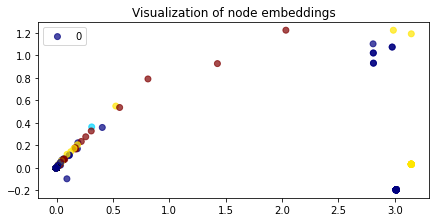

In [224]:
from sklearn.decomposition import PCA

plot_embeddings(node_embeddings_a2v, random_nodes.GroupCode, PCA(n_components=2))

Implementing Attri2vec on **whole graph with Amazon's similarities**:

In [225]:
x_inp_a2v_2, x_out_a2v_2, history_a2v_2 = attri2vec_model(G=sim_prod_graph, batch_size=100, epochs=1)

Generate samples ...
Attri2vec model ...
link_classification: using 'ip' method to combine node embeddings into edge embeddings
Keras model ...
Train the model ...
59292/59292 [==============================] - 9525s 161ms/step - loss: 0.7353 - binary_accuracy: 0.5018


In [227]:
node_embeddings_a2v_2 = generate_embeddings(G=sim_prod_graph, features=node_data, 
                                      generator=Attri2VecNodeGenerator(G=sim_prod_graph, batch_size=100), 
                                      x_inp_src=x_inp_a2v_2[0], x_out_src = x_out_a2v_2[0])

5427/5427 [==============================] - 19s 4ms/step


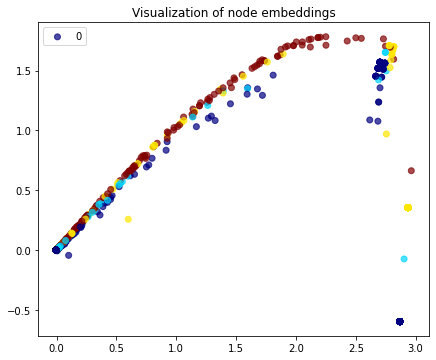

In [229]:
from sklearn.decomposition import PCA

plot_embeddings(node_embeddings_a2v_2, node_data.GroupCode, PCA(n_components=2))

## GraphSAGE

In [67]:
import stellargraph as sg
from stellargraph.mapper import GraphSAGELinkGenerator, GraphSAGENodeGenerator
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UnsupervisedSampler

In [68]:
def graphsage_model(G,
                    number_of_walks=1, length=5,
                    batch_size=50, epochs = 4, num_samples=[10,5],
                    layer_sizes=[50,50]):
    nodes = list(G.nodes())
    print("Generate samples ...")
    unsupervised_samples = UnsupervisedSampler(G, nodes=nodes, length=length, number_of_walks=number_of_walks)
    generator = GraphSAGELinkGenerator(G, batch_size, num_samples)
    train_gen = generator.flow(unsupervised_samples)
    print("GraphSAGE model ...")
    graphsage = GraphSAGE(layer_sizes=layer_sizes, generator=generator, bias=True, dropout=0.0, normalize="l2")
    x_inp, x_out = graphsage.in_out_tensors()
    prediction = link_classification(output_dim=1, output_act="sigmoid", edge_embedding_method="ip")(x_out)
    print("Keras model ...")
    model = keras.Model(inputs=x_inp, outputs=prediction)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.binary_crossentropy,
        metrics=[keras.metrics.binary_accuracy])
    print("Train ...")
    history = model.fit(train_gen,epochs=epochs,verbose=1,use_multiprocessing=False,workers=4,shuffle=True)
    return x_inp, x_out, history

Implementing on the **random subgraph** for testing purposes:

1. Training model:

In [181]:
x_inp, x_out, history = graphsage_model(G=random_sub_graph,batch_size=100,epochs=1)

Generate samples ...
GraphSAGE model ...
link_classification: using 'ip' method to combine node embeddings into edge embeddings
Keras model ...
Train ...
1117/1117 [==============================] - 200s 167ms/step - loss: 0.7378 - binary_accuracy: 0.5482


2. Calculating embeddings with trained model:

In [70]:
node_embeddings = generate_embeddings(G=random_sub_graph, features=random_nodes, 
                    generator=GraphSAGENodeGenerator(G=random_sub_graph, batch_size=100, num_samples=[10, 5]), 
                    x_inp_src=x_inp[0::2], x_out_src=x_out[0])

10000/10000 [==============================] - 96s 10ms/step


In [74]:
node_embeddings.shape

(100000, 50)

3. Plotting embeddings with the help of feature reduction:

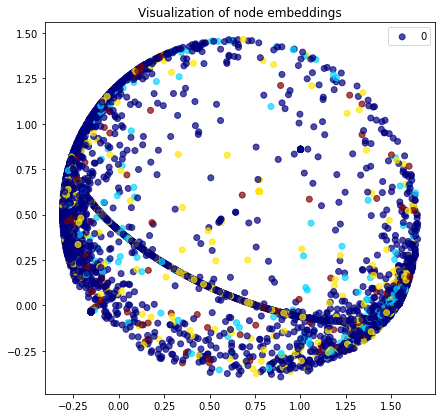

In [72]:
plot_embeddings(node_embeddings,random_nodes.GroupCode,PCA(n_components=2))

Implementing GraphSAGE on whole graph with (Amazon's) similarity links:

1. Training the model:

In [184]:
x_inp, x_out, history = graphsage_model(G=sim_prod_graph,number_of_walks=3, length=3,
                                        batch_size=100, epochs = 1, num_samples=[10,5],
                                        layer_sizes=[64,32])

Generate samples ...
GraphSAGE model ...
link_classification: using 'ip' method to combine node embeddings into edge embeddings
Keras model ...
Train ...
35575/35575 [==============================] - 3889s 109ms/step - loss: 0.7290 - binary_accuracy: 0.5588


2. Calculating node embeddings:

In [186]:
node_embeddings = generate_embeddings(G=sim_prod_graph, features=node_data, 
                    generator=GraphSAGENodeGenerator(G=sim_prod_graph, batch_size=100, num_samples=[10, 5]), 
                    x_inp_src=x_inp[0::2], x_out_src=x_out[0])

5427/5427 [==============================] - 237s 44ms/step


In [187]:
node_embeddings.shape

(542664, 32)

3. Plotting nodes using PCA for feature reduction:

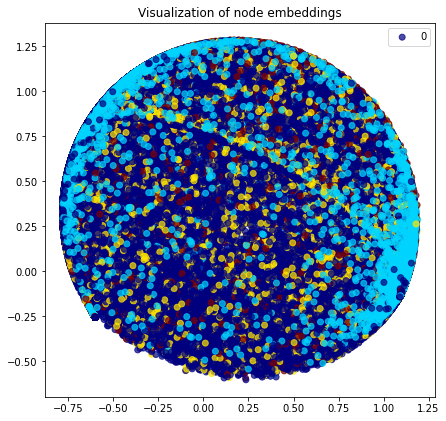

In [190]:
plot_embeddings(node_embeddings,node_data.GroupCode,PCA(n_components=2))

4. Plotting nodes using TSNE for feature reduction (takes much more longer than PCA):

/opt/anaconda3/envs/NS/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/NS/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


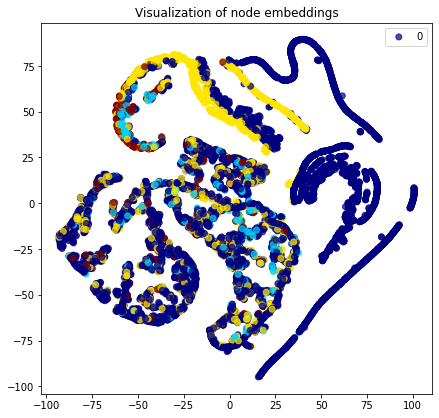

In [193]:
from sklearn.manifold import TSNE

plot_embeddings(node_embeddings[:10000,:],node_data.GroupCode.values[:10000],TSNE(n_components=2))

## Find recommendations
using embeddings and Nearest Neighbour algorithm

In [237]:
from sklearn.neighbors import NearestNeighbors

# just in case, load the nodes data again, if `nodes` overwritten
nodes = pd.read_csv("data/nodes.csv")
node_info = nodes.set_index("Id")
# embeddings to dataframe, index from the node attribute table which was used to create graph
X = pd.DataFrame(data=node_embeddings,index=node_data.index)
X_a2v_2 = pd.DataFrame(data=node_embeddings_a2v_2,index=node_data.index)

In [196]:
def recommender(sample_nodes,no_recommendations, embeddings_df, nodes_df):
    NN = NearestNeighbors()
    NN.fit(embeddings_df)
    samples_df = embeddings_df.loc[sample_nodes]
    recommendations = NN.kneighbors(samples_df,
                                    n_neighbors=no_recommendations,
                                    return_distance=False)
    """ Print results """
    for i in range(len(sample_nodes)):
        product = sample_nodes[i]
        recoms = recommendations[i]
        print(f"For product {nodes_df.loc[product,'Group']} '{nodes_df.loc[product,'Title']}' we recommend: ")
        for j,rec in enumerate(recoms):
            print(f"{j+1}. {nodes_df.loc[rec,'Group']} '{nodes_df.loc[rec,'Title']}';")
    
    return recommendations

In [197]:
randoms = np.random.choice(random_nodes.index,size=5,replace=False)

In [198]:
recommendations = recommender(randoms,5,X,nodes)

For product Book 'Everything Happens for a Reason' we recommend: 
1. Book 'The Corporate Mule: Don't Give Up Your Soul for the Company Goal : A Novel';
2. Book 'Vocabulary and Language Teaching (Applied Linguistics and Language Study)';
3. Book 'Women, Work, and Pensions: International Issues and Prospects';
4. Book 'A Companion to Beethoven's Pianoforte Sonatas: Complete Analyses';
5. Book 'Monologues from Moliere';
For product Book 'Animals in the Fall (Preparing for Winter)' we recommend: 
1. Book 'The Official Overstreet Comic Book Price Guide, 32nd Edition (Overstreet Comic Book Price Guide)';
2. Music 'Beautiful My Child';
3. Book 'Orchid Blues (Holly Barker Novels (Hardcover))';
4. Book 'Little Miss Somersault (Mr. Men and Little Miss)';
5. Book 'War of Words: Getting to the Heart of Your Communication Struggles (Resources for Changing Lives)';
For product Music 'Play Bach [2002]' we recommend: 
1. DVD 'Planet Out.Com: Short Movie Awards';
2. DVD 'Adventures of Pinocchio';
3. DV

In [199]:
randoms, recommendations

(array([477590, 124250, 116655, 113170,  64740]),
 array([[472175, 480717, 213152,  25617, 344276],
        [122906, 369993, 191409, 481514, 354258],
        [115394, 542330, 340867, 265143, 254467],
        [111938, 431841, 274401, 404620,  60177],
        [ 64041, 540977, 372806, 512309,  38048]]))

In [240]:
def calc_similarities(G, sample_nodes):
    """ Calculates similarities for sample products and all other products
    in relevant graph G (given in networkx format) """
    node_ids = list(G.nodes())
    similarity = pd.DataFrame(index=node_ids)
    for product in sample_nodes:
        adamics = [list(nx.adamic_adar_index(G,[(product,idx)]))[0][2] for idx in node_ids]
        jaccards = [list(nx.jaccard_coefficient(G,[(product,idx)]))[0][2] for idx in node_ids]
        pref_att = [list(nx.preferential_attachment(G,[(product,idx)]))[0][2] for idx in node_ids]
        similarity[f'{product}_adamics'] = adamics 
        similarity[f'{product}_jaccards'] = jaccards
        similarity[f'{product}_prefatts'] = pref_att
    return similarity

In [241]:
sim_table = calc_similarities(G,randoms)

In [242]:
sim_table.sample(5)

,477590_adamics,477590_jaccards,477590_prefatts,124250_adamics,124250_jaccards,124250_prefatts,116655_adamics,116655_jaccards,116655_prefatts,113170_adamics,113170_jaccards,113170_prefatts,64740_adamics,64740_jaccards,64740_prefatts
51023,0,0.0,0,0.0,0.0,0,0,0.0,0,0,0.0,0,0.0,0.0,0
462414,0,0.0,0,0.0,0.0,4,0,0.0,0,0,0.0,0,0.0,0.0,4
405732,0,0.0,0,0.0,0.0,0,0,0.0,0,0,0.0,0,0.0,0.0,0
507562,0,0.0,0,0.0,0.0,3,0,0.0,0,0,0.0,0,0.0,0.0,3
544923,0,0.0,0,0.0,0.0,2,0,0.0,0,0,0.0,0,0.0,0.0,2


We can see that our graph is so sparse that similarity metrics are mostly zeros.

Percentages of zero values in columns:

In [243]:
100 * np.sum(sim_table==0)/542664

477590_adamics     100.000000
477590_jaccards    100.000000
477590_prefatts    100.000000
124250_adamics      99.999447
124250_jaccards     99.999447
124250_prefatts     45.369879
116655_adamics     100.000000
116655_jaccards    100.000000
116655_prefatts    100.000000
113170_adamics     100.000000
113170_jaccards    100.000000
113170_prefatts    100.000000
64740_adamics       99.999631
64740_jaccards      99.999631
64740_prefatts      45.369879
dtype: float64

In [270]:
def recoms_with_distances(sample_nodes,no_recommendations, embeddings_df, nodes_df, metric='minkowski'):
    NN = NearestNeighbors(metric=metric)
    NN.fit(embeddings_df)
    samples_df = embeddings_df.loc[sample_nodes]
    distances, recommendations = NN.kneighbors(samples_df,
                                    n_neighbors=no_recommendations,
                                    return_distance=True)
    """ Print results """
    for i in range(len(sample_nodes)):
        product = sample_nodes[i]
        recoms = recommendations[i]
        print(f"For product {nodes_df.loc[product,'Group']} '{nodes_df.loc[product,'Title']}' we recommend: ")
        for j,rec in enumerate(recoms):
            print(f"{j+1}. {nodes_df.loc[rec,'Group']} '{nodes_df.loc[rec,'Title']}': {distances[i,j]}")
    
    return recommendations,distances

In [273]:
recoms_min, dists_min = recoms_with_distances(randoms,5,X,nodes)

For product Book 'Everything Happens for a Reason' we recommend: 
1. Book 'The Corporate Mule: Don't Give Up Your Soul for the Company Goal : A Novel': 2.107342389479072e-08
2. Book 'Vocabulary and Language Teaching (Applied Linguistics and Language Study)': 5.1619135632563484e-08
3. Book 'Women, Work, and Pensions: International Issues and Prospects': 6.989264278445262e-08
4. Book 'A Companion to Beethoven's Pianoforte Sonatas: Complete Analyses': 7.146346092667955e-08
5. Book 'Monologues from Moliere': 7.450580596923828e-08
For product Book 'Animals in the Fall (Preparing for Winter)' we recommend: 
1. Book 'The Official Overstreet Comic Book Price Guide, 32nd Edition (Overstreet Comic Book Price Guide)': 0.0
2. Music 'Beautiful My Child': 0.002347250934690237
3. Book 'Orchid Blues (Holly Barker Novels (Hardcover))': 0.004107864107936621
4. Book 'Little Miss Somersault (Mr. Men and Little Miss)': 0.0042238193564116955
5. Book 'War of Words: Getting to the Heart of Your Communication 

In [274]:
recoms_jac, dists_jac = recoms_with_distances(randoms,5,X,nodes,metric='jaccard')

/opt/anaconda3/envs/NS/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1975: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


For product Book 'Everything Happens for a Reason' we recommend: 
1. Book 'Langenscheidt New College German Dictionary: German-English - English German Thumb-indexed': 0.0
2. Book 'Repositioning Asia : From Bubble to Sustainable Economy': 0.0
3. Music 'Sacred Steel: Traditional Sacred African-American Steel Guitar Music In Florida': 0.0
4. Music 'Cowboy Up: The Official PRCA Rodeo Album': 0.0
5. Music 'Angola Prison Worksongs': 0.0
For product Book 'Animals in the Fall (Preparing for Winter)' we recommend: 
1. Book 'Langenscheidt New College German Dictionary: German-English - English German Thumb-indexed': 0.0
2. Book 'Repositioning Asia : From Bubble to Sustainable Economy': 0.0
3. Music 'Sacred Steel: Traditional Sacred African-American Steel Guitar Music In Florida': 0.0
4. Music 'Cowboy Up: The Official PRCA Rodeo Album': 0.0
5. Music 'Angola Prison Worksongs': 0.0
For product Music 'Play Bach [2002]' we recommend: 
1. Book 'Langenscheidt New College German Dictionary: German-Engl

In [276]:
recoms_euc, dists_euc = recoms_with_distances(randoms,5,X,nodes,metric='euclidean')

For product Book 'Everything Happens for a Reason' we recommend: 
1. Book 'The Corporate Mule: Don't Give Up Your Soul for the Company Goal : A Novel': 2.107342389479072e-08
2. Book 'Vocabulary and Language Teaching (Applied Linguistics and Language Study)': 5.1619135632563484e-08
3. Book 'Women, Work, and Pensions: International Issues and Prospects': 6.989264278445262e-08
4. Book 'A Companion to Beethoven's Pianoforte Sonatas: Complete Analyses': 7.146346092667955e-08
5. Book 'Monologues from Moliere': 7.450580596923828e-08
For product Book 'Animals in the Fall (Preparing for Winter)' we recommend: 
1. Book 'The Official Overstreet Comic Book Price Guide, 32nd Edition (Overstreet Comic Book Price Guide)': 0.0
2. Music 'Beautiful My Child': 0.002347250934690237
3. Book 'Orchid Blues (Holly Barker Novels (Hardcover))': 0.004107864107936621
4. Book 'Little Miss Somersault (Mr. Men and Little Miss)': 0.0042238193564116955
5. Book 'War of Words: Getting to the Heart of Your Communication 

In [277]:
recoms_man, dists_man = recoms_with_distances(randoms,5,X,nodes,metric='manhattan')

For product Book 'Everything Happens for a Reason' we recommend: 
1. Book 'The Corporate Mule: Don't Give Up Your Soul for the Company Goal : A Novel': 0.0
2. Book 'Vocabulary and Language Teaching (Applied Linguistics and Language Study)': 2.163376393582439e-07
3. Book 'Ordinary Differential Equations': 2.522508566471515e-07
4. Book 'Small Engines - Workbook': 2.5776967049750965e-07
5. Book 'Huguenot Heritage: The History and Contribution of the Huguenots in Britain': 2.592410055513028e-07
For product Book 'Animals in the Fall (Preparing for Winter)' we recommend: 
1. Book 'The Official Overstreet Comic Book Price Guide, 32nd Edition (Overstreet Comic Book Price Guide)': 0.0
2. Music 'Beautiful My Child': 0.007270322646945715
3. Book 'Little Miss Somersault (Mr. Men and Little Miss)': 0.010818075970746577
4. Book 'Orchid Blues (Holly Barker Novels (Hardcover))': 0.012504938640631735
5. Book 'War of Words: Getting to the Heart of Your Communication Struggles (Resources for Changing Liv

In [278]:
recoms_can, dists_can = recoms_with_distances(randoms,5,X,nodes,metric='canberra')

For product Book 'Everything Happens for a Reason' we recommend: 
1. Book 'The Corporate Mule: Don't Give Up Your Soul for the Company Goal : A Novel': 0.0
2. Book 'Ordinary Differential Equations': 0.00014654824362281068
3. Book 'The Oxford Color Thesaurus': 0.0002555185498807632
4. Book 'A Way of Light': 0.0005239148662258918
5. Book 'Funky Snowman (Holiday Cards)': 0.0006155249391892235
For product Book 'Animals in the Fall (Preparing for Winter)' we recommend: 
1. Book 'The Official Overstreet Comic Book Price Guide, 32nd Edition (Overstreet Comic Book Price Guide)': 0.0
2. Book 'The Passionate Learner : How Teachers and Parents Can Help Children Reclaim the Joy of Discovery': 0.20112208791370303
3. Book 'Little Miss Somersault (Mr. Men and Little Miss)': 0.21652332473833188
4. Book 'Progressive Popular Classics of the Great Composers (Progressive Young Beginners)': 0.22930818280414095
5. Book 'Spanish Decorative Ironwork: With over 300 Illustrations (Dover Pictorial Archive Series

In [279]:
recoms_can

array([[472175, 413373, 277007, 275425, 386014],
       [122906, 431449, 481514, 454617, 380410],
       [115394, 542330, 340867, 265143, 414724],
       [111938, 409448, 274401, 535957, 179641],
       [ 64041, 372806, 540977, 469471, 354994]])

In [281]:
recoms_ex, dists_ex = recoms_with_distances([413373],10,X,nodes,metric='canberra')

For product Book 'Ordinary Differential Equations' we recommend: 
1. Book 'New Perspectives on Racial Identity Development: A Theoretical and Practical Anthology': 0.0
2. Book 'Early Medieval Architecture (Oxford History of Art)': 0.02912242060610261
3. Book 'Forgotten Traditions of Ancient Chinese Medicine: A Chinese View from the Eighteenth Century': 0.034714205724526076
4. Book 'Piano Music 1888-1905': 0.03635138561488203
5. Book 'Jewish Wisdom in the Hellenistic Age (Old Testament Library)': 0.03755226696541708
6. Book 'For Freedom's Sake: The Life of Fannie Lou Hamer (Women in American History)': 0.04768622170128029
7. Book 'A Picture for Harold's Room': 0.04968661401656147
8. Book 'Us and Them': 0.05134575942149007
9. Book 'Speech After Stroke: A Manual for the Speech Pathologist and the Family Member': 0.051867991664105856
10. Book 'Self Study Bible Course': 0.05242889106849586


In [283]:
recoms_with_distances([413373],10,X,nodes,metric='manhattan')

For product Book 'Ordinary Differential Equations' we recommend: 
1. Book 'New Perspectives on Racial Identity Development: A Theoretical and Practical Anthology': 0.0
2. Book 'Piano Music 1888-1905': 0.0037333709187805653
3. Book 'Forgotten Traditions of Ancient Chinese Medicine: A Chinese View from the Eighteenth Century': 0.004229085519909859
4. Book 'Early Medieval Architecture (Oxford History of Art)': 0.005138689652085304
5. Book 'For Freedom's Sake: The Life of Fannie Lou Hamer (Women in American History)': 0.005720074288547039
6. Book 'Japanese Street Slang': 0.006933593424037099
7. Music 'New Edition': 0.007252936251461506
8. Book 'Us and Them': 0.007587513420730829
9. Book 'Jewish Wisdom in the Hellenistic Age (Old Testament Library)': 0.007963450392708182
10. Book 'Speech After Stroke: A Manual for the Speech Pathologist and the Family Member': 0.008565748576074839


(array([[408685, 142784, 211175, 256967,  92266, 444315, 233164, 285268,
          26903, 245235]]),
 array([[0.        , 0.00373337, 0.00422909, 0.00513869, 0.00572007,
         0.00693359, 0.00725294, 0.00758751, 0.00796345, 0.00856575]]))

In [275]:
X.loc[randoms[:2]]

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Id,,,,,,,,,,,,,,,,,,,,,
477590,0.007892,0.304213,-0.016629,-0.001241,0.007815,0.531985,-0.008904,0.636965,-0.434645,0.010656,...,0.000010,-0.000011,-0.000013,0.000010,0.000012,-0.000013,0.000008,0.000012,-0.000013,-0.000013
124250,0.001310,0.064338,0.001007,-0.001435,0.000688,0.078520,0.000495,0.090709,-0.067894,0.018652,...,0.209563,-0.200297,-0.248200,0.180711,0.253898,-0.272761,0.202728,0.258962,-0.284269,-0.250720


In [260]:
sim_table.head()

,477590_adamics,477590_jaccards,477590_prefatts,124250_adamics,124250_jaccards,124250_prefatts,116655_adamics,116655_jaccards,116655_prefatts,113170_adamics,113170_jaccards,113170_prefatts,64740_adamics,64740_jaccards,64740_prefatts
500600,0,0.0,0,0.0,0.0,1,0,0.0,0,0,0.0,0,0.0,0.0,1
1,0,0.0,0,0.0,0.0,2,0,0.0,0,0,0.0,0,0.0,0.0,2
454888,0,0.0,0,0.0,0.0,1,0,0.0,0,0,0.0,0,0.0,0.0,1
2,0,0.0,0,0.0,0.0,1,0,0.0,0,0,0.0,0,0.0,0.0,1
355935,0,0.0,0,0.0,0.0,1,0,0.0,0,0,0.0,0,0.0,0.0,1


In [312]:
def print_sim_products(nodes_df, similarity_df, max_similars=10):
    for col in similarity_df.columns:
        prod = int(col.split('_')[0])
        group = node_info.loc[prod,"Group"]
        title = node_info.loc[prod,"Title"]
        df = similarity_df[similarity_df[col]>0]
        df = df.sort_values(col,ascending=False)
        similars = df.index
        values = list(df[col].values)
        if len(similars)==0: continue
        print(f"Product {group} '{title}':")
        print(f"Metric {col.split('_')[1]}: ")
        for i,similar in enumerate(similars):
            if i >= max_similars: break
            group = str(node_info.loc[similar,"Group"])
            title = str(node_info.loc[similar,"Title"])
            print(f"{i+1}. {group} '{title}': {values[i]}")

In [269]:
print_sim_products(nodes,sim_table)

Product Book 'The Official Overstreet Comic Book Price Guide, 32nd Edition (Overstreet Comic Book Price Guide)':
Metric adamics: 
1. Book 'The Official Overstreet Comic Book Price Guide, 32nd Edition (Overstreet Comic Book Price Guide)': 0.9102392266268373
2. Book 'The Official Overstreet Comic Book Price Guide, 33rd edition (Official Overstreet Comic Book Price Guide)': 0.9102392266268373
3. Book 'The Official Overstreet Comic Book Price Guide, 31st Edition (Overstreet Comic Book Price Guide, 31st)': 0.9102392266268373
Product Book 'The Official Overstreet Comic Book Price Guide, 32nd Edition (Overstreet Comic Book Price Guide)':
Metric jaccards: 
1. Book 'The Official Overstreet Comic Book Price Guide, 32nd Edition (Overstreet Comic Book Price Guide)': 1.0
2. Book 'The Official Overstreet Comic Book Price Guide, 33rd edition (Official Overstreet Comic Book Price Guide)': 1.0
3. Book 'The Official Overstreet Comic Book Price Guide, 31st Edition (Overstreet Comic Book Price Guide, 31st

In [258]:
node_info = nodes.set_index("Id")
for col in sim_table.columns:
    prod = int(col.split('_')[0])
    group = node_info.loc[prod,"Group"]
    title = node_info.loc[prod,"Title"]
    print(f"Product {group} '{title}': metric {col.split('_')[1]}: ")
    df = sim_table[sim_table[col]>0]
    df = df.sort_values(col,ascending=False)
    similars = df.index
    values = list(df[col].values)
    for i,similar in enumerate(similars):
        group = str(node_info.loc[similar,"Group"])
        title = str(node_info.loc[similar,"Title"])
        print(f"{i+1}. {group} '{title}': {values[i]}")
        if i >= 10: break

Product Book 'The Corporate Mule: Don't Give Up Your Soul for the Company Goal : A Novel': metric adamics: 
Product Book 'The Corporate Mule: Don't Give Up Your Soul for the Company Goal : A Novel': metric jaccards: 
Product Book 'The Corporate Mule: Don't Give Up Your Soul for the Company Goal : A Novel': metric prefatts: 
Product Book 'The Official Overstreet Comic Book Price Guide, 32nd Edition (Overstreet Comic Book Price Guide)': metric adamics: 
1. Book 'The Official Overstreet Comic Book Price Guide, 32nd Edition (Overstreet Comic Book Price Guide)': 0.9102392266268373
2. Book 'The Official Overstreet Comic Book Price Guide, 33rd edition (Official Overstreet Comic Book Price Guide)': 0.9102392266268373
3. Book 'The Official Overstreet Comic Book Price Guide, 31st Edition (Overstreet Comic Book Price Guide, 31st)': 0.9102392266268373
Product Book 'The Official Overstreet Comic Book Price Guide, 32nd Edition (Overstreet Comic Book Price Guide)': metric jaccards: 
1. Book 'The Offi

In [238]:
recommendations_a2v_2 = recommender(randoms,5,X_a2v_2,nodes)

For product Book 'Everything Happens for a Reason' we recommend: 
1. Book 'LOVE SICK';
2. Book 'Taltos';
3. Book 'Tim McGraw and the Dancehall Doctors: This Is Ours';
4. Book 'Go Home, Fatso';
5. Book 'Edmund Dulac - His Book Illustrations: A Bibliography';
For product Book 'Animals in the Fall (Preparing for Winter)' we recommend: 
1. Book 'LOVE SICK';
2. Book 'Taltos';
3. Book 'Tim McGraw and the Dancehall Doctors: This Is Ours';
4. Book 'Go Home, Fatso';
5. Book 'Edmund Dulac - His Book Illustrations: A Bibliography';
For product Music 'Play Bach [2002]' we recommend: 
1. Book 'LOVE SICK';
2. Book 'Taltos';
3. Book 'Tim McGraw and the Dancehall Doctors: This Is Ours';
4. Book 'Go Home, Fatso';
5. Book 'Edmund Dulac - His Book Illustrations: A Bibliography';
For product Book 'Jingle Bear (reissue) (Serendipity)' we recommend: 
1. Book 'LOVE SICK';
2. Book 'Taltos';
3. Book 'Tim McGraw and the Dancehall Doctors: This Is Ours';
4. Book 'Go Home, Fatso';
5. Book 'Edmund Dulac - His Book

In [239]:
recoms_a2v_2, dists_a2v_2 = recoms_with_distances(randoms,5,X_a2v_2,nodes)

For product Book 'Everything Happens for a Reason' we recommend: 
1. Book 'LOVE SICK': 0.0
2. Book 'Taltos': 0.0
3. Book 'Tim McGraw and the Dancehall Doctors: This Is Ours': 0.0
4. Book 'Go Home, Fatso': 0.0
5. Book 'Edmund Dulac - His Book Illustrations: A Bibliography': 0.0
For product Book 'Animals in the Fall (Preparing for Winter)' we recommend: 
1. Book 'LOVE SICK': 0.0
2. Book 'Taltos': 0.0
3. Book 'Tim McGraw and the Dancehall Doctors: This Is Ours': 0.0
4. Book 'Go Home, Fatso': 0.0
5. Book 'Edmund Dulac - His Book Illustrations: A Bibliography': 0.0
For product Music 'Play Bach [2002]' we recommend: 
1. Book 'LOVE SICK': 0.0
2. Book 'Taltos': 0.0
3. Book 'Tim McGraw and the Dancehall Doctors: This Is Ours': 0.0
4. Book 'Go Home, Fatso': 0.0
5. Book 'Edmund Dulac - His Book Illustrations: A Bibliography': 0.0
For product Book 'Jingle Bear (reissue) (Serendipity)' we recommend: 
1. Book 'LOVE SICK': 0.0
2. Book 'Taltos': 0.0
3. Book 'Tim McGraw and the Dancehall Doctors: This 

In [284]:
r,d = recoms_with_distances(randoms,5, X_a2v_2, nodes, metric='manhattan')

For product Book 'Everything Happens for a Reason' we recommend: 
1. Book 'Sims Book 2: The Portero Method (Sims)': 0.0
2. Book 'The Rainbow Serpent': 0.0
3. Book 'Wheeler's Dental Anatomy, Physiology and Occlusion': 0.0
4. Book 'Your Bridge to a Better Future': 0.0
5. Book 'The Boy Who Found Hashem': 0.0
For product Book 'Animals in the Fall (Preparing for Winter)' we recommend: 
1. Book 'Sims Book 2: The Portero Method (Sims)': 0.0
2. Book 'The Rainbow Serpent': 0.0
3. Book 'Wheeler's Dental Anatomy, Physiology and Occlusion': 0.0
4. Book 'Your Bridge to a Better Future': 0.0
5. Book 'The Boy Who Found Hashem': 0.0
For product Music 'Play Bach [2002]' we recommend: 
1. Book 'Sims Book 2: The Portero Method (Sims)': 0.0
2. Book 'The Rainbow Serpent': 0.0
3. Book 'Wheeler's Dental Anatomy, Physiology and Occlusion': 0.0
4. Book 'Your Bridge to a Better Future': 0.0
5. Book 'The Boy Who Found Hashem': 0.0
For product Book 'Jingle Bear (reissue) (Serendipity)' we recommend: 
1. Book 'Sim

In [286]:
selection = [548548, 548549, 548550, 548551]

In [290]:
r,d = recoms_with_distances(selection,5, X_a2v_2, node_info, metric='manhattan')

For product DVD 'The House Of Morecock' we recommend: 
1. Book 'Robertson's Practical English-Thai Dictionary': 0.0
2. Book 'Hide and Sneak (Hardy Boys (Hardcover))': 0.709054172039032
3. Book 'The Kingdom of Infinite Number: A Field Guide': 1.2382665276527405
4. Book 'A King's Cutter (Mariner's Library Fiction Classics)': 1.3349066078662872
5. DVD 'My Favorite Broadway - The Leading Ladies': 1.4109865427017212
For product Book 'Catholic Bioethics and the Gift of Human Life' we recommend: 
1. Book 'Ghost of a Chance': 0.0
2. Book 'Out of the Ruins (Wright, Sally S. Ben Reese Mystery Series, 4.)': 0.0
3. Music 'Soul On Fire': 0.0
4. DVD 'My Favorite Broadway - The Leading Ladies': 0.0
5. Video 'Exposure: Environmental Links to Breast Cancer': 0.0
For product DVD '1, 2, 3 Soleils: Taha, Khaled, Faudel' we recommend: 
1. Book 'Business Decision Making in China': 0.0
2. Music 'The Best of Candy Dulfer': 0.0
3. Book 'Inside Barcelona : Discovering the Classic Interiors of Barcelona (Inside.

In [291]:
r,d = recoms_with_distances(selection,5, X_a2v_2, node_info, metric='minkowski')

For product DVD 'The House Of Morecock' we recommend: 
1. Book 'Robertson's Practical English-Thai Dictionary': 5.960464477539063e-08
2. Book 'Hide and Sneak (Hardy Boys (Hardcover))': 0.1490022838115692
3. Book 'The Kingdom of Infinite Number: A Field Guide': 0.3123815655708313
4. Music 'II': 0.32492175698280334
5. Music 'The Best of Candy Dulfer': 0.3369734585285187
For product Book 'Catholic Bioethics and the Gift of Human Life' we recommend: 
1. Book 'Out of the Ruins (Wright, Sally S. Ben Reese Mystery Series, 4.)': 8.429369557916289e-08
2. Music 'Soul On Fire': 8.429369557916289e-08
3. DVD 'My Favorite Broadway - The Leading Ladies': 8.429369557916289e-08
4. Video 'Exposure: Environmental Links to Breast Cancer': 8.429369557916289e-08
5. Book 'Citizen Coors : A Grand Family Saga of Business, Politics, and Beer': 8.429369557916289e-08
For product DVD '1, 2, 3 Soleils: Taha, Khaled, Faudel' we recommend: 
1. Book 'Business Decision Making in China': 8.429369557916289e-08
2. Music '

In [294]:
degree_centrality = nx.degree_centrality(G)

In [299]:
degree_tbl = pd.DataFrame(data=degree_centrality.values(),index=degree_centrality.keys(),columns=["Degree_Centrality"])
degree_tbl = degree_tbl.sort_values("Degree_Centrality",ascending=False)
tbl = degree_tbl.join(node_info[["Group","Title"]])

In [300]:
tbl.head(10)

,Degree_Centrality,Group,Title
548091,0.000160,DVD,Laura
458358,0.000140,Book,Diagnostic and Statistical Manual of Mental Di...
239107,0.000127,Book,The Prince
222074,0.000116,Book,Publication Manual of the American Psychologic...
45146,0.000111,Book,Taber's Cyclopedic Medical Dictionary -Thumb-I...
239327,0.000109,Book,Confessions (Oxford World's Classics)
55387,0.000105,Book,Getting to Yes: Negotiating Agreement Without ...
27832,0.000103,Book,The Winter's Tale (Folger Shakespeare Library)
277567,0.000101,Book,The Secret Garden
436020,0.000101,Book,The TEMPEST


In [303]:
tbl = tbl.reset_index()
tbl["Degree"] = tbl.apply(lambda row: G.degree[int(row["index"])],axis=1)
tbl = tbl.set_index("index")
tbl.head(10)

,Degree_Centrality,Group,Title,Degree
index,,,,
548091,0.000160,DVD,Laura,87
458358,0.000140,Book,Diagnostic and Statistical Manual of Mental Di...,76
239107,0.000127,Book,The Prince,69
222074,0.000116,Book,Publication Manual of the American Psychologic...,63
45146,0.000111,Book,Taber's Cyclopedic Medical Dictionary -Thumb-I...,60
239327,0.000109,Book,Confessions (Oxford World's Classics),59
55387,0.000105,Book,Getting to Yes: Negotiating Agreement Without ...,57
27832,0.000103,Book,The Winter's Tale (Folger Shakespeare Library),56
277567,0.000101,Book,The Secret Garden,55


In [308]:
sample_products = [list(tbl.index)[0]]
metrics = ['minkowski','manhattan','canberra']
embs = {"GraphSAGE": X,"Attri2vec": X_a2v_2} # GraphSAGE, Attri2vec
for product in sample_products:
    for emb in embs: 
        for metric in metrics:
            print(product, f"{node_info.loc[product,'Group']} '{node_info.loc[product,'Title']}':")
            print(f"{emb} embeddings: distance metric {metric}")
            recoms_with_distances([product],
                                  no_recommendations=5, 
                                  embeddings_df=embs[emb], 
                                  nodes_df=node_info, 
                                  metric=metric)
            print("")
    

548091 DVD 'Laura':
GraphSAGE embeddings: distance metric minkowski
For product DVD 'Laura' we recommend: 
1. DVD 'Michiganfest 2002': 0.0
2. Book 'The Pickwick Papers : BBC (BBC Radio Presents)': 0.000214374071219936
3. Book 'Chinese Brain Twisters : Fast, Fun Puzzles That Help Children Develop Quick Minds': 0.0008455562056042254
4. Book 'Cardiovascular Nutrition: Strategies and Tools for Disease Management and Prevention': 0.001189003000035882
5. Book 'Men in the Off Hours (Vintage Contemporaries)': 0.0014744069194421172

548091 DVD 'Laura':
GraphSAGE embeddings: distance metric manhattan
For product DVD 'Laura' we recommend: 
1. DVD 'Michiganfest 2002': 0.0
2. Book 'The Pickwick Papers : BBC (BBC Radio Presents)': 0.0006997332675382495
3. Book 'Chinese Brain Twisters : Fast, Fun Puzzles That Help Children Develop Quick Minds': 0.0033854282228276134
4. DVD 'Doctor Who - The Armageddon Factor (The Key to Time Series, Part 6)': 0.004233678453601897
5. Book 'Cardiovascular Nutrition: St

In [314]:
node_ids = list(G.nodes())
similarity = pd.DataFrame(index=node_ids)
for product in [548091]:
    # adamics = [list(nx.adamic_adar_index(G,[(product,idx)]))[0][2] for idx in node_ids]
    jaccards = [list(nx.jaccard_coefficient(G,[(product,idx)]))[0][2] for idx in node_ids]
    pref_att = [list(nx.preferential_attachment(G,[(product,idx)]))[0][2] for idx in node_ids]
    # similarity[f'{product}_adamics'] = adamics 
    similarity[f'{product}_jaccards'] = jaccards
    similarity[f'{product}_prefatts'] = pref_att
print_sim_products(nodes_df=node_info, similarity_df=similarity, max_similars=20)

Product DVD 'Laura':
Metric jaccards: 
1. DVD 'Laura': 1.0
2. Video 'Beloved Infidel': 0.011494252873563218
3. DVD 'The Strange Love of Martha Ivers / Kirk Douglas on Film - A Biography': 0.011494252873563218
4. DVD 'The Strange Love of Martha Ivers': 0.011494252873563218
5. DVD 'The Strange Love Of Martha Ivers': 0.011494252873563218
6. Book 'The Ghost and Mrs. Muir': 0.011494252873563218
7. Video 'The Fireball': 0.011494252873563218
8. Video 'Ladies of the Chorus': 0.011494252873563218
9. Video 'Last Holiday': 0.011494252873563218
10. DVD 'Wanted for Murder': 0.011494252873563218
11. DVD 'Cloak and Dagger': 0.011494252873563218
12. DVD 'Hangmen Also Die!': 0.011494252873563218
13. Video 'Cloak and Dagger': 0.011494252873563218
14. DVD 'Mademoiselle': 0.011494252873563218
15. Video 'Mississippi Mermaid': 0.011494252873563218
16. DVD 'Mississippi Mermaid': 0.011494252873563218
17. DVD 'Carnival Story': 0.011494252873563218
18. Video '5 Fingers': 0.011363636363636364
19. DVD 'Devil Doll